<a href="https://colab.research.google.com/github/sivanathvenigalla/Jaya-Venkatasivanath_INFO5731_Fall2024/blob/main/Venigalla_Jayavenkatasivanath_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


Topic 1: web, inform, extract, document, use, search, page, approach, fact, word
Topic 2: extract, inform, relat, text, task, use, evalu, approach, method, perform
Topic 3: data, opinion, signal, extract, use, method, properti, surfac, inform, function
Topic 4: inform, extract, research, use, ontolog, applic, knowledg, process, develop, document
Topic 5: featur, extract, imag, inform, use, process, chemic, present, select, support
Topic 6: model, extract, inform, propos, featur, relat, entiti, method, network, approach
Topic 7: extract, inform, pattern, use, rule, text, data, document, learn, approach
Topic 8: inform, featur, extract, use, method, video, base, analysi, propos, algorithm
Topic 9: imag, method, extract, use, inform, data, propos, spatial, classif, featur
Topic 10: extract, inform, model, data, learn, use, task, train, text, perform


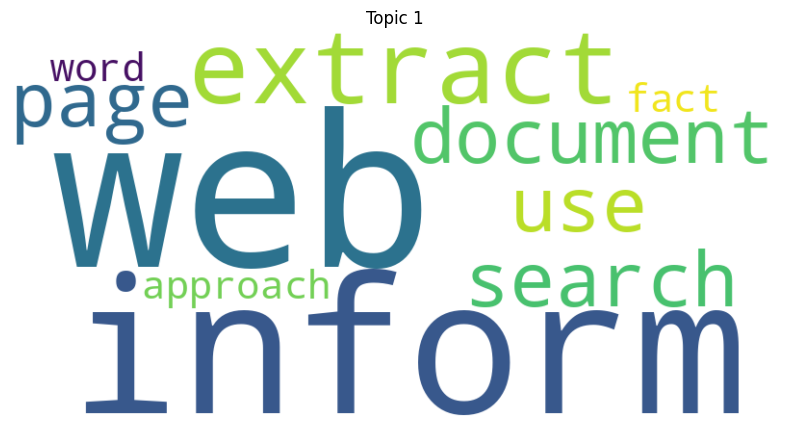

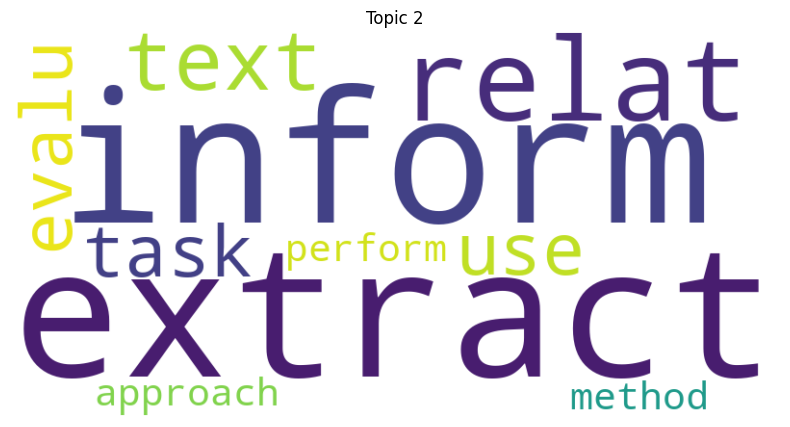

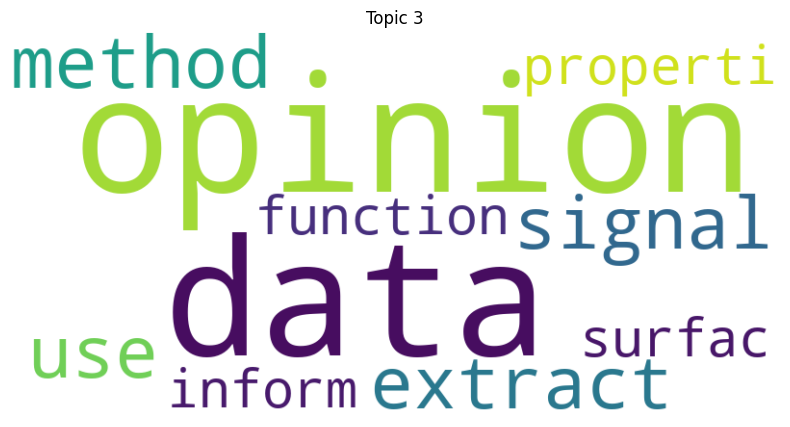

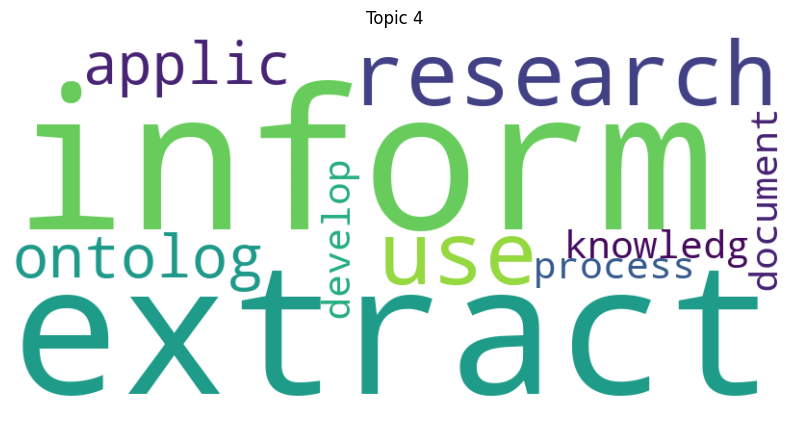

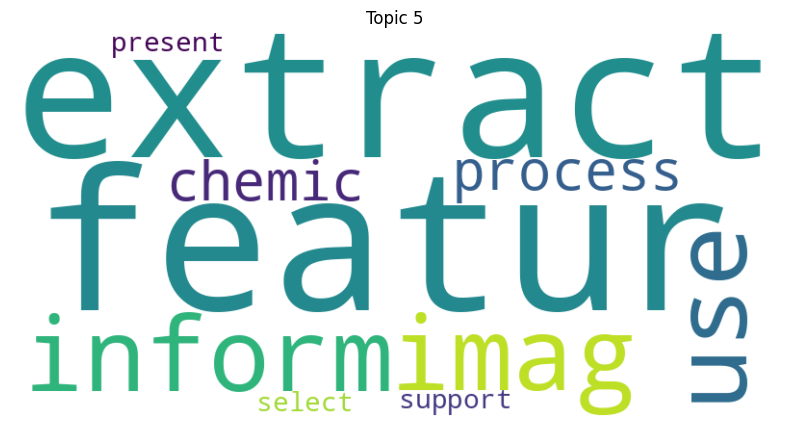

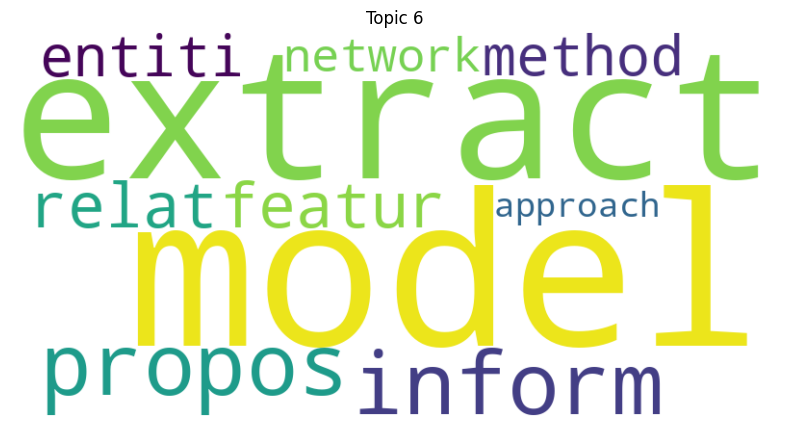

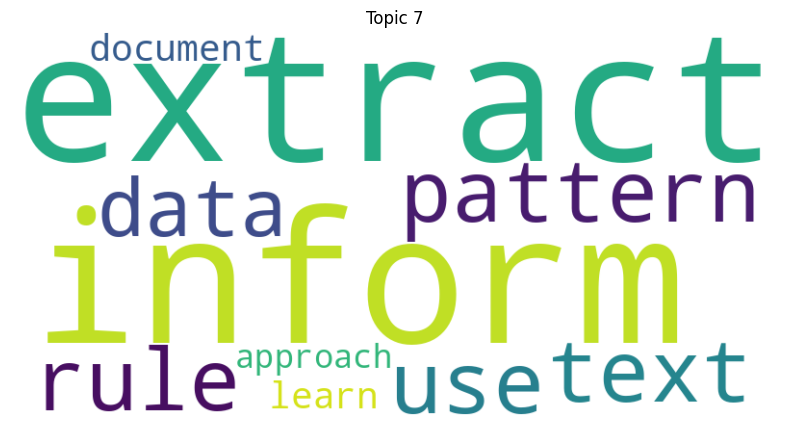

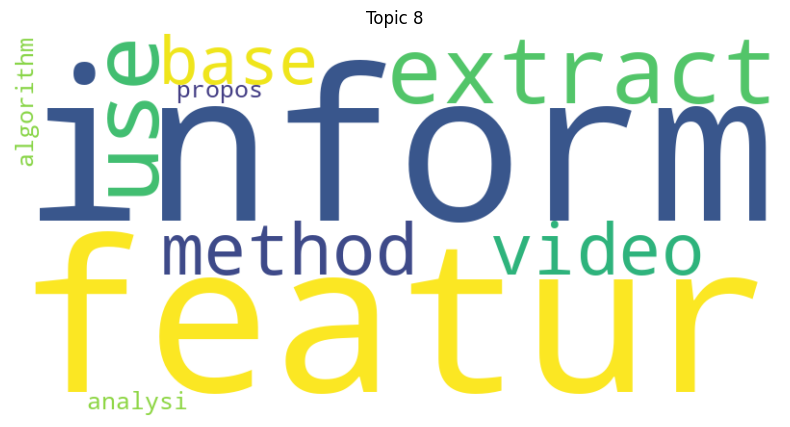

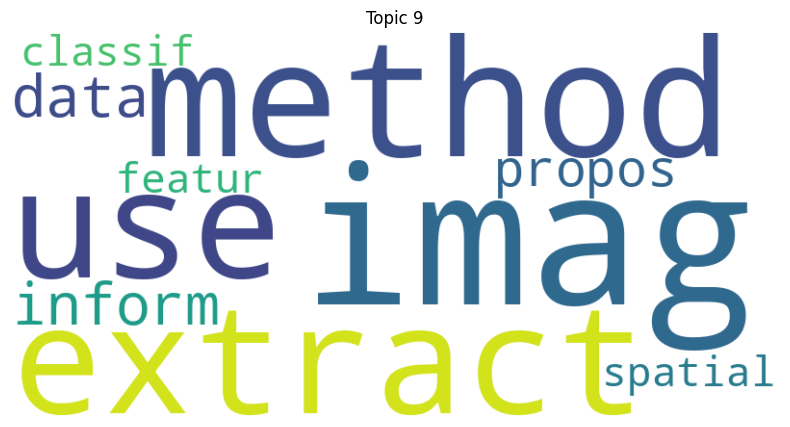

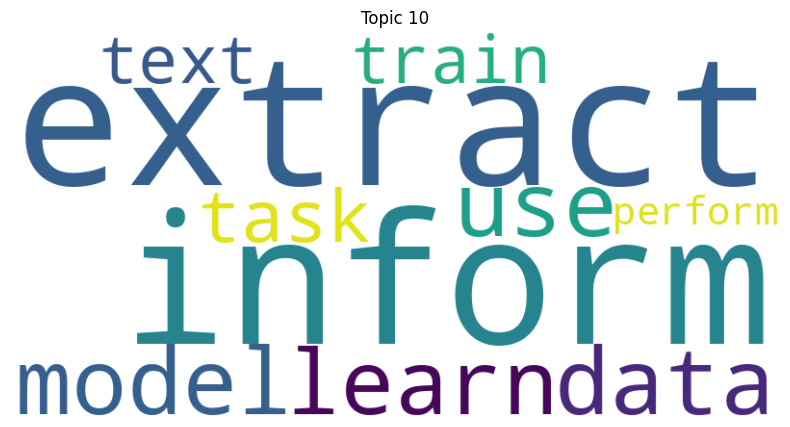

In [ ]:
# Write your code here
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/sivanathvenigalla/Jaya-Venkatasivanath_INFO5731_Fall2024/refs/heads/main/annotated_abstracts.csv")

# Preprocess the abstracts column (adjust the column name as needed)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

data['cleaned_text'] = data['Processed_Abstract'].apply(preprocess_text)  # Adjust column name

# Convert text to a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Limit features for simplicity
dtm = vectorizer.fit_transform(data['cleaned_text'])
feature_names = vectorizer.get_feature_names_out()

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-no_top_words:][::-1]]
        topics.append(top_words)
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    return topics

topics = display_topics(lda_model, feature_names, 10)

# Create word clouds for each topic
for idx, topic in enumerate(topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx + 1}")
    plt.show()




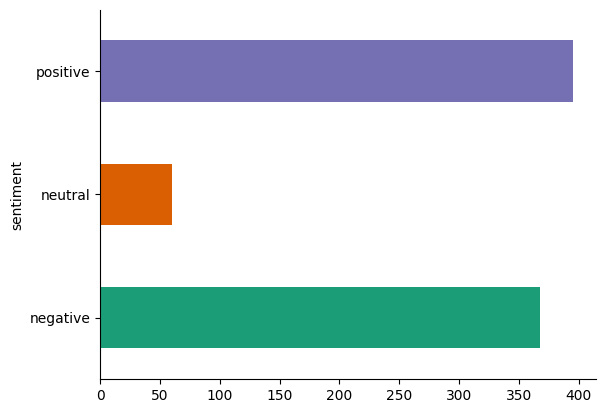

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Separate features and target
X = data['cleaned_text']  # Adjust column name as per your dataset
y = data['sentiment']   # Target column for sentiment

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_log = log_reg.predict(X_test)

# Support Vector Machine Classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_svm = svm.predict(X_test)

# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_cv_scores = cross_val_score(log_reg, X_tfidf, y, cv=skf, scoring='accuracy')
svm_cv_scores = cross_val_score(svm, X_tfidf, y, cv=skf, scoring='accuracy')

print(f"Logistic Regression Cross-Validation Accuracy: {log_cv_scores.mean():.3f}")
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.3f}")

# Performance metrics function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")


Logistic Regression Cross-Validation Accuracy: 0.617
SVM Cross-Validation Accuracy: 0.601

Performance Metrics for Logistic Regression:
Accuracy: 0.648
Precision: 0.601
Recall: 0.648
F1 Score: 0.624

Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.69      0.66        74
     neutral       0.00      0.00      0.00        12
    positive       0.66      0.71      0.68        79

    accuracy                           0.65       165
   macro avg       0.43      0.47      0.45       165
weighted avg       0.60      0.65      0.62       165


Performance Metrics for SVM:
Accuracy: 0.636
Precision: 0.590
Recall: 0.636
F1 Score: 0.612

Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.66      0.65        74
     neutral       0.00      0.00      0.00        12
    positive       0.63      0.71      0.67        79

    accuracy                           0.64       165
   macr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the final_data.csv file
data = pd.read_csv("https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv")  # Replace with the correct path to your file

# Display the first few rows of the dataset
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum().sort_values(ascending=False))

# Fill numerical features with their median
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

# Fill categorical features with the mode
categorical_features = data.select_dtypes(include=['object']).columns
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

# Convert categorical features into dummy/one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Check the updated dataset
print(data.shape)

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

# Select features highly correlated with the target (lastsoldprice)
correlation_target = correlation_matrix['lastsoldprice'].sort_values(ascending=False)
print(correlation_target.head(20))

# Select top features based on correlation and domain knowledge
selected_features = [
    'bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt',
    'zestimate', 'zipcode'
]

# Define features and target variable
X = data[selected_features]
y = data['lastsoldprice']

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Define a function to evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


   Unnamed: 0                             address  \
0           2  Address: 1160 Mission Street #2007   
1           5       Address: 260 King Street #475   
2           7     Address: 560 Missouri Street #B   
3           9        Address: 350 Missouri Street   
4          11         Address: 3658 Folsom Street   

                                                info  \
0   San FranciscoSales price: 1300000Sales date: ...   
1   San FranciscoSales price: 750000Sales date: 0...   
2   San FranciscoSales price: 1495000Sales date: ...   
3   San FranciscoSales price: 2700000Sales date: ...   
4   San FranciscoSales price: 1530000Sales date: ...   

                   z_address  bathrooms  bedrooms  finishedsqft lastsolddate  \
0  1160 Mission St UNIT 2007        2.0       2.0        1043.0   02/17/2016   
1       260 King St UNIT 475        1.0       1.0         903.0   02/17/2016   
2        560 Missouri St # B        4.0       3.0        1425.0   02/17/2016   
3            350 Missour

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import pipeline, AutoTokenizer
import torch

# Load your data (assuming it's in CSV format)
url = "https://raw.githubusercontent.com/sivanathvenigalla/Jaya-Venkatasivanath_INFO5731_Fall2024/refs/heads/main/annotated_abstracts.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Assuming the 'sentiment' column contains the ground truth sentiment labels
# and 'Processed_Abstract' contains the text data
texts = data['Processed_Abstract'].tolist()  # Abstracts
true_labels = data['sentiment'].tolist()  # Actual sentiment labels

device = 0 if torch.cuda.is_available() else -1

# Initialize sentiment analysis pipeline with BERT model
sentiment_analyzer = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Function to split long text into smaller chunks
def split_text_into_chunks(text, max_length=512):
    # Tokenize the text with truncation enabled
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length)
    # Split tokens into chunks of max_length tokens
    chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
    # Convert token chunks back to text
    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]

# Perform sentiment analysis for each chunk
predictions = []
for text in texts:
    # Split the text if it exceeds 512 tokens
    if len(tokenizer.encode(text)) > 512:
        chunks = split_text_into_chunks(text)
        chunk_predictions = [sentiment_analyzer(chunk)[0]['label'] for chunk in chunks]
        # Aggregate the results (e.g., take majority vote)
        final_prediction = max(set(chunk_predictions), key=chunk_predictions.count)
    else:
        final_prediction = sentiment_analyzer(text)[0]['label']

    predictions.append(final_prediction)
# Map BERT's output (labels) to your dataset's sentiment categories
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'negative',
    'LABEL_2': 'neutral',
    'LABEL_3': 'positive',
    'LABEL_4': 'positive'
}

# Map the predictions to sentiment labels
predictions_mapped = [label_mapping.get(label, 'neutral') for label in predictions]

# Evaluate the performance
accuracy = accuracy_score(true_labels, predictions_mapped)
precision = precision_score(true_labels, predictions_mapped, average='weighted')
recall = recall_score(true_labels, predictions_mapped, average='weighted')
f1 = f1_score(true_labels, predictions_mapped, average='weighted')

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


                                               Title  \
0  Zero-Shot Information Extraction via Chatting ...   
1  Evaluating ChatGPT's Information Extraction Ca...   
2  InstructUIE: Multi-task Instruction Tuning for...   
3  Unified Structure Generation for Universal Inf...   
4  Large Language Models for Generative Informati...   

                                            Abstract  \
0  Zero-shot information extraction (IE) aims to ...   
1  The capability of Large Language Models (LLMs)...   
2  Large language models have unlocked strong mul...   
3  Information extraction suffers from its varyin...   
4  Information Extraction (IE) aims to extract st...   

                                  Processed_Abstract sentiment  
0  zeroshot inform extract ie aim build ie system...  positive  
1  capabl larg languag model llm like chatgpt com...  positive  
2  larg languag model unlock strong multitask cap...  negative  
3  inform extract suffer vari target heterogen st...  negative  
4

Token indices sequence length is longer than the specified maximum sequence length for this model (1426 > 512). Running this sequence through the model will result in indexing errors


Accuracy: 0.0729
Precision: 0.0053
Recall: 0.0729
F1 Score: 0.0099


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
